<a href="https://colab.research.google.com/github/Nikitaion/TensorFlowLearning/blob/main/02_neural_network_classification_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Classification with Neural Networks in TensorFlow

In this notebook we a going to learn how to write neural networks for classification problems

A classification problem is where you try to classify something as one thing or another

For example, you might want to:

Predict whether or not someone has heart disease based on their health parameters. This is called **binary** classification since there are only two options.
Decide whether a photo of is of food, a person or a dog. This is called **multi-class** classification since there are more than two options.
Predict what categories should be assigned to a Wikipedia article. This is called **multi-label** classification since a single article could have more than one category assigned.

## Typical architecture of a classification neural network 

The word *typical* is on purpose.

Because the architecture of a classification neural network can widely vary depending on the problem you're working on.

However, there are some fundamentals all deep neural networks contain:
* An input layer.
* Some hidden layers.
* An output layer.

Much of the rest is up to the data analyst creating the model.

The following are some standard values you'll often use in your classification neural networks.

| **Hyperparameter** | **Binary Classification** | **Multiclass classification** |
| --- | --- | --- |
| Input layer shape | Same as number of features (e.g. 5 for age, sex, height, weight, smoking status in heart disease prediction) | Same as binary classification |
| Hidden layer(s) | Problem specific, minimum = 1, maximum = unlimited | Same as binary classification |
| Neurons per hidden layer | Problem specific, generally 10 to 100 | Same as binary classification |
| Output layer shape | 1 (one class or the other) | 1 per class (e.g. 3 for food, person or dog photo) |
| Hidden activation | Usually [ReLU](https://www.kaggle.com/dansbecker/rectified-linear-units-relu-in-deep-learning) (rectified linear unit) | Same as binary classification |
| Output activation | [Sigmoid](https://en.wikipedia.org/wiki/Sigmoid_function) | [Softmax](https://en.wikipedia.org/wiki/Softmax_function) |
| Loss function | [Cross entropy](https://en.wikipedia.org/wiki/Cross_entropy#Cross-entropy_loss_function_and_logistic_regression) ([`tf.keras.losses.BinaryCrossentropy`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/BinaryCrossentropy) in TensorFlow) | Cross entropy ([`tf.keras.losses.CategoricalCrossentropy`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy) in TensorFlow) |
| Optimizer | [SGD](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD) (stochastic gradient descent), [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) | Same as binary classification |

***Table 1:*** *Typical architecture of a classification network.* ***Source:*** *Adapted from page 295 of [Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow Book by Aurélien Géron](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)*

Don't worry if not much of the above makes sense right now, we'll get plenty of experience as we go through this notebook.

Let's start by importing TensorFlow as the common alias `tf`. For this notebook, make sure you're using version 2.x+.

In [34]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Creating data to view and fit

In [35]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples, 
                    noise=0.03,
                    random_state=42)

In [36]:
# Check out the features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [37]:
# See the first 10 labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [38]:
# Make dataframe of features and labels
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [39]:
# Check out the different labels
circles.label.value_counts()

1    500
0    500
Name: label, dtype: int64

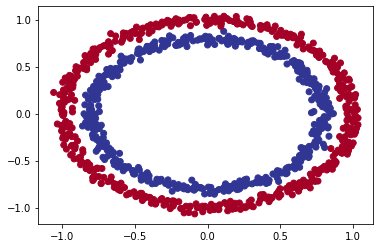

In [40]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

## Input and output shapes

One of the most common issues you'll run into when building neural networks is shape mismatches.

More specifically, the shape of the input data and the shape of the output data.

In our case, we want to input `X` and get our model to predict `y`.

So let's check out the shapes of `X` and `y`.

In [41]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [42]:
# Check how many samples we have
len(X), len(y)

(1000, 1000)

So we've got as many `X` values as we do `y` values, that makes sense.

Let's check out one example of each.

In [43]:
# View the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

# Steps in modeling

In [44]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)

])

model.compile(loss=tf.keras.losses.binary_crossentropy,
                          optimizer=tf.keras.optimizers.SGD(),
                          metrics=["accuracy"])

history = model.fit(X, y, epochs=50)

Epoch 1/50
32/32 [==============================] - 1s 1ms/step - loss: 1.0162 - accuracy: 0.4800
Epoch 2/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6972 - accuracy: 0.5010
Epoch 3/50
32/32 [==============================] - 0s 1ms/step - loss: 0.7019 - accuracy: 0.4750
Epoch 4/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6979 - accuracy: 0.4940
Epoch 5/50
32/32 [==============================] - 0s 1ms/step - loss: 0.6964 - accuracy: 0.5030
Epoch 6/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6963 - accuracy: 0.5240
Epoch 7/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6992 - accuracy: 0.4930
Epoch 8/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6970 - accuracy: 0.5160
Epoch 9/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6991 - accuracy: 0.4840
Epoch 10/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6964 - accuracy: 0.4680
Epoch 11/50
32/32 [

In [63]:
# Improving our model
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
  # tf.keras.layers.Dense(100, activation="relu"), # wtih relu we get the right prediction
  # tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)

])

model_3.compile(loss=tf.keras.losses.binary_crossentropy,
                          optimizer=tf.keras.optimizers.SGD(),
                          metrics=["accuracy"])

history = model_3.fit(X, y, epochs=50)

Epoch 1/50
32/32 [==============================] - 0s 1ms/step - loss: 1.8689 - accuracy: 0.4700
Epoch 2/50
32/32 [==============================] - 0s 1ms/step - loss: 0.6977 - accuracy: 0.5040
Epoch 3/50
32/32 [==============================] - 0s 1ms/step - loss: 0.6968 - accuracy: 0.4660
Epoch 4/50
32/32 [==============================] - 0s 1ms/step - loss: 0.6952 - accuracy: 0.4850
Epoch 5/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6949 - accuracy: 0.4740
Epoch 6/50
32/32 [==============================] - 0s 1ms/step - loss: 0.6941 - accuracy: 0.5230
Epoch 7/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6962 - accuracy: 0.4780
Epoch 8/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6952 - accuracy: 0.4940
Epoch 9/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6956 - accuracy: 0.4860
Epoch 10/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6946 - accuracy: 0.4840
Epoch 11/50
32/32 [

# Let's create a function to visualize our model predictions

* Take in a trained model, features (X) and labels (y)
* Create a meshgrid of the different X values
* Make predictions across meshgrid
* Plot the predictions as well as a line between zones (where each unique class falls)

In [64]:
def plot_decision_boundary(model, X, y):
  """
  Plots decision boundary created by a model predicting on X.
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to make predictions on these)
  X_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

  # Make predictions
  y_pred = model.predict(X_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("Doing multi-class classification")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("Doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

Doing binary classification


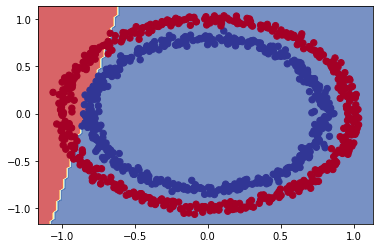

In [65]:
# Check out the predictions our model is making
plot_decision_boundary(model=model_3, X=X, y=y)

In [66]:
 X[:, 0].min() # - 0.1

-1.0595024599098635

In [67]:
X[:, 0].max() + 0.1

1.1337117525463374

In [68]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [69]:
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

len(xx)
X_in = np.c_[xx.ravel(), yy.ravel()]
len(X_in)

xx.shape

(100, 100)